In [1]:
from IPython.display import YouTubeVideo, Markdown, SVG
from functools import partial
YouTubeVideo_formato = partial(YouTubeVideo, modestbranding=1, disablekb=0,
                               width=640, height=360, autoplay=0, rel=0, showinfo=0)

display(Markdown(filename='../../preamble.md'))

### Instrucciones  y metodología asíncrona
Hola a todas y todos

- Este notebook forma parte del curso **INFO147: Computación científica con Python** de la carrera de Ingeniería Civil Informática de la Universidad Austral de Chile
- El profesor responsable es **Pablo Huijse**, por favor hacer sus consultas por slack o al correo phuijse at inf dot uach dot cl
- El material del curso se encuentra en https://github.com/magister-informatica-uach/INFO147 
- Se recomienda tener una copia local actualizada del repositorio


Para estudiar este material de forma asíncrona se recomienda seguir el flujo que se presenta a continuación

```bash 
for sección in notebook
do
    leer(sección) # Para incorporar los nuevos contenidos
    if ejercicios in sección
        resolver(ejercicios) # Para poner en práctica lo aprendido
    if video in sección
        ver(video) # Para profundizar y analizar la solución del ejercicio
done
```

In [18]:
%autosave 0
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import pandas as pd

from IPython.display import display
import ipywidgets as widgets
from functools import partial
slider_layout = widgets.Layout(width='600px', height='20px')
slider_style = {'description_width': 'initial'}
IntSlider_nice = partial(widgets.IntSlider, style=slider_style, layout=slider_layout, continuous_update=False)
FloatSlider_nice = partial(widgets.FloatSlider, style=slider_style, layout=slider_layout, continuous_update=False)
SelSlider_nice = partial(widgets.SelectionSlider, style=slider_style, layout=slider_layout, continuous_update=False)
from scipy.special import erf
gaussian_pdf = lambda x, mu=0, s=1: np.exp(-0.5*(x-mu)**2/s**2)/(s*np.sqrt(2*np.pi))
gaussian_cdf = lambda x, mu=0, s=1: 0.5 + 0.5*erf((x-mu)/(s*np.sqrt(2)))

Autosave disabled


# Estadística

La estadística busca:

> Describir fenómenos complejos a partir de observaciones parciales 

> Inferir propiedades de una población basándonos en una muestra

> Usar datos para responder preguntas y tomar decisiones

La estadística es:

> Disciplina científica dedicada al desarrollo y estudio de métodos para recopilar, analizar y extraer información de los datos


## Estadística descriptiva

Sea una muestra de datos. Para entenderla mejor podemos empezar describiendola:
- ¿Discreto o continuo? ¿No-negativo?
- ¿Dónde está localizada? **Media**
- ¿Cuál es su disperción? **Varianza**
- ¿Son las colas iguales o distintas? **Simetría** (*Skewness*)
- ¿Son las colas ligeras o pesadas? **Curtosis** (*Kurtosis*)
- ¿Tiene una moda o múltiples modas?
- ¿Cuantiles? ¿Percentiles? 
- ¿Existen *outliers*?

Podemos responder estas preguntas usando [estadísticos de resumen](https://docs.scipy.org/doc/scipy/reference/stats.html#summary-statistics)

In [ ]:
x = np.linspace(-11, 10, num=1000)
px = 0.7*gaussian_pdf(x, mu=-4, s=2) + 0.3*gaussian_pdf(x, mu=3, s=2)
N = 1000; 
np.random.seed(0)
hatx = np.concatenate((-4 + 2*np.random.randn(int(0.7*N)), 
                       (3 + 2*np.random.randn(int(0.3*N)))))

scipy.stats.describe(hatx)

En ciertos casos podemos responder estas preguntas graficamente usando:

### Histograma

- Es una representación numérica de una distribución
- Nos permite visualizar las características de la distribución
- Se construye dividiendo el dominio en **bines** y contando los datos que caen en cada **bin**
- Está definido por la posición y tamaño de los bines
- Método no-paramétrico para representar distribuciones

In [ ]:
plt.close('all'); fig, ax = plt.subplots(figsize=(7, 4))

def update_plot(nbins): 
    ax.cla()
    ax.plot(x, px, 'k-', linewidth=4, alpha=0.8)
    hist, bin_edges = np.histogram(hatx, bins=nbins, density=True)
    ax.bar(bin_edges[:-1], hist, width=bin_edges[1:] - bin_edges[:-1], 
           edgecolor='k', align='edge', alpha=0.8)
    ax.set_xlabel('x')
    
widgets.interact(update_plot, nbins=SelSlider_nice(options=[2, 5, 10, 15, 20, 50], value=5));

### Kernel density estimation (KDE)

Mismo objetivo que el histograma pero
1. Cada dato es "su propio bin"
1. Los bines se pueden traslapar
1. No se escoge la posición o fronteras de bines, solo su ancho

Para un set de observaciones unidimensionales $\{x_i\}_{i=1,\ldots, N}$ con dominio continuo

$$
\hat f_h(x) = \frac{1}{Nh} \sum_{i=1}^N \kappa \left ( \frac{x - x_i}{h} \right)
$$

donde 
- $h$ es el **ancho de banda del kernel** o **tamaño de kernel**
- $\kappa(u)$ es una **función de kernel** que debe ser positiva, con media cero e integrar a la unidad

Por ejemplo  el famoso kernel Gaussiano

$$
\kappa(u) = \frac{1}{\sqrt{2\pi}} \exp \left ( - \frac{u^2}{2} \right),
$$

Ojo: 
- Usar un kernel gaussiano no es lo mismo que asumir que los datos se distribuyen gaussianos
- Se puede usar un kernel gaussiano en datos que no se distribuyen gaussianos

In [ ]:
from sklearn.neighbors.kde import KernelDensity
plt.close('all'); fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(x, px, 'k-', linewidth=4, alpha=0.8)
ax.scatter(hatx, np.zeros_like(hatx), marker='+', c='k', s=20, alpha=0.1)
ax.set_xlabel('x')
line_kde = ax.plot(x, np.zeros_like(x))
#hs = 0.9*np.std(hatx)*N**(-1/5)
def update(k): 
    kde = scipy.stats.gaussian_kde(hatx, bw_method=lambda kde: k*kde.silverman_factor() )
    line_kde[0].set_ydata(kde.pdf(x))
    
widgets.interact(update, k=SelSlider_nice(description="$k=h/h_s$", options=[1/8, 1/4, 1/2, 1, 2, 4], value=1));

Más opciones de kernels en [`sklearn.neighbors.KernelDensity`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity)

,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
ID,,,,,,,,,,,,,,,,,,,,,
8142302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<IPython.core.display.Javascript object>


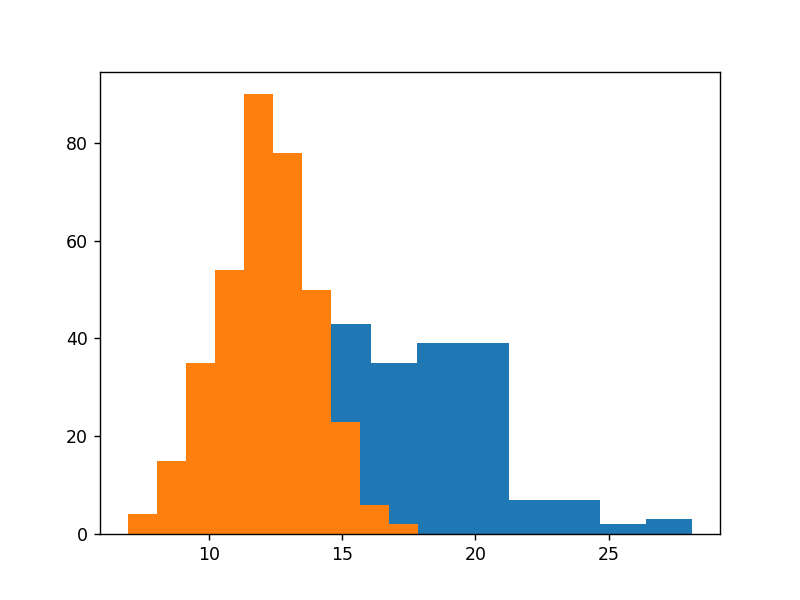

(array([ 4., 15., 35., 54., 90., 78., 50., 23.,  6.,  2.]),
 array([ 6.981 ,  8.0679,  9.1548, 10.2417, 11.3286, 12.4155, 13.5024,
        14.5893, 15.6762, 16.7631, 17.85  ]),
 <a list of 10 Patch objects>)

In [22]:
import pandas as pd
df = pd.read_csv('../data/cancer.csv', index_col=0)
display(df.head())

plt.figure()
plt.hist(df.loc[df.diagnosis=='M']["radius1"])
plt.hist(df.loc[df.diagnosis=='B']["radius1"])

# Fundamentos de probabilidad



## Variables aleatorias (VA)

> Es una variable que, al ser observada, puede tomar valores diferentes

Por ejemplo, el resultado de lanzar un dado o de lanzar una moneda

La medición de un sensor con ruido es también una variable aletoria

### Notación

- Para denotar a una VA usamos mayusculas: $X$
- Para denotar las observaciones de una VA usamos: $x\sim X$
- La probabilidad de observar $x$ es $P(X=x)$


### Distribución

Dominio
    
- Puede ser discreta o continua
    

    
- El comportamiento de $X$ está dictado por 
    - Función de masa de probabilidad (para $X$ discreta)
    
    $P(X=x) \in [0, 1]$
    
    $\sum_{x\in\mathcal{X}} P(X=x) = 1$    
    
    - Función de densidad de probabilidad (para $X$ continua)
    
    $f(x) \geq 0$
    
    $\int_{x\in\mathcal{X}} f(x) \,dx = 1$, 
    
    $P(a\leq X \leq b) = F(b) - F(a) = \int_{a}^{b} f(x) \,dx$
    
        - Función de densidad acumulada: 
        
        $F(a)  = \int_{-\infty}^{a} f(x) \,dx$
        
        
> **Importante:** Sólo en el caso discreto la distribución puede interpretarse como probabilidad

<IPython.core.display.Javascript object>


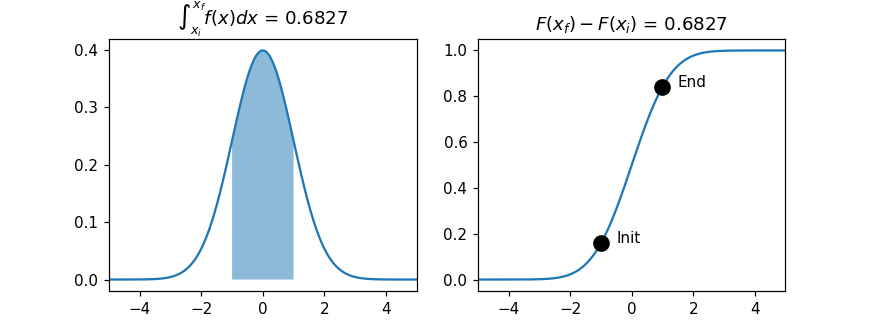

interactive(children=(FloatRangeSlider(value=(-1.0, 1.0), description='$x_i, x_f$', max=5.0, min=-5.0), Output…

In [4]:
plt.close('all'); fig, ax = plt.subplots(1, 2, figsize=(8, 3))
dt=1e-4; x = np.arange(-5, 5, step=dt)

def update_plot(x_r):
    xi, xf = x_r
    for axis in ax:
        axis.cla(); 
        axis.set_xlim([-5, 5]);
    ax[0].plot(x, gaussian_pdf(x)); ax[1].plot(x, gaussian_cdf(x));
    xrange = np.arange(xi, xf, step=dt)
    ax[0].fill_between(xrange, 0, gaussian_pdf(xrange), alpha=0.5)
    ax[1].scatter([xi, xf], [gaussian_cdf(xi), gaussian_cdf(xf)], s=100, c='k', zorder=100)
    ax[1].text(xi+0.5, gaussian_cdf(xi), "Init"); ax[1].text(xf+0.5, gaussian_cdf(xf), "End")
    ax[0].set_title("$\int_{x_i}^{x_f} f(x) dx$ = %0.4f" %(np.sum(gaussian_pdf(xrange))*dt))
    area = gaussian_cdf(xf) - gaussian_cdf(xi)
    ax[1].set_title("$F(x_f) - F(x_i)$ = %0.4f" %(area if area >= 0 else 0))

widgets.interact(update_plot, 
         x_r=widgets.FloatRangeSlider(description=r"$x_i, x_f$", min=-5, max=5, value=[-1, 1]));

## Probabilidad conjunta, marginal y condicional

La probabilidad de dos eventos $X=x$ e $Y=y$ se caracteriza con la distribución conjunta $P(X, Y)$

A partir de la conjunta se pueden obtener la probabilidad marginal de $X$ (o de $Y$)

$$
P(X=x) = \sum_{y \in \mathcal{Y}} P(X=x, Y=y) 
$$

Usando la conjunta y las marginales podemos obtener las probabilidades condicionales

$$
P(Y=y|X=x) = \frac{P(X=x, Y=y)}{P(X=x)}
$$

(ssi $P(X=x) \neq 0$)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
x = np.arange(-4, 5, 1)
y = np.arange(-4, 5, 1)
X, Y = np.meshgrid(x, y)
XY = np.zeros_like(X)
XY[-3, 2:-2] = 1
XY[2, 2:-2] = 1
XY[2:-2, 4] = 1
XY = XY/np.sum(XY)
ax.bar(x, np.sum(XY, axis=1), zdir='x', zs=-4)
ax.bar(y, np.sum(XY, axis=0), zdir='y', zs=5)
ax.bar3d(X.ravel(), Y.ravel(), np.zeros_like(XY.ravel()), 1, 1, XY.ravel())
ax.set_xlim([-4, 5]); ax.set_xlabel('X')
ax.set_ylim([-4, 5]); ax.set_ylabel('Y')

ax2 = fig.add_subplot(1, 2, 2)

def update_plot(x):
    ax2.cla()
    ax2.bar(y, XY[X==x]/np.sum(XY[X==x]))
    ax2.set_title("P(Y|X={0})".format(x))
    ax2.set_ylim([0, 0.55])
    ax2.set_xlim([-4, 4])
    
widgets.interact(update_plot, x=IntSlider_nice(min=-4, max=4, value=0));

## Independencia

Si dos V.A. son independientes podemos escribir
$$
\begin{align}
P(x, y)  &= P(x)P(y|x)\nonumber \\
&= P(x)P(y) \nonumber
\end{align}
$$

> Saber que ocurrió $x$ no me sirve da nada para saber si ocurrió $y$
 

Dos V.A. son condicionalmente independientes si

$$
P(x, y|z)  = P(x|z)P(y|z)
$$


## Regla de la cadena

Podemos descomponer una probabilidad conjunta como

$$
\begin{align}
P(x_1, x_2, x_3) &= P(x_3|x_2, x_1) P(x_1, x_2) \nonumber \\
&= P(x_3|x_2, x_1) P(x_2|x_1) P(x_1) \nonumber 
\end{align}
$$

## Ley de probabilidad total

Si el espacio de probabilidad está particionado en $N$ pedazos y se conocen las probabilidades condicionales $P(X=x|Y=y_i)$ podemos calcular la probabilidad del evento $x$ usando

$$
P(X=x) = \sum_{i=1}^N P(X=x|Y=y_i) P(Y=y_i)
$$

## Teorema de Bayes

Podemos escribir 

- la probabilidad de un evento $y$ dado condiciones $x$: $p(y|x)$ 
- en función de nuestro conocimiento *a priori* sobre $y$: $p(y$)
- y de la verosimilitud de que se observen dichas condiciones si $y$ ocurriese: $p(x|y)$

como

$$
P(y | x) = \frac{P(x|y) P(y)}{P(x)} = \frac{P(x|y) P(y)}{\sum_{y\in\mathcal{Y}} P(x|y) P(y)}
$$

In [ ]:
fig, ax = plt.subplots(2, figsize=(7, 3), tight_layout=True)
x = np.linspace(-4, 4, num=1000)

def update_plot(loc, scale, skew, shape):
    distribution1 = scipy.stats.skewnorm(skew, loc=loc, scale=scale)
    distribution2 = scipy.stats.gennorm(shape, loc=loc, scale=scale*np.sqrt(2))
    [ax_.cla() for ax_ in ax]
    ax[0].plot(x, distribution1.pdf(x))
    ax[1].plot(x, distribution2.pdf(x))
    
widgets.interact(update_plot, loc=FloatSlider_nice(min=-3, max=3), 
                 scale=FloatSlider_nice(min=0.01, max=2., value=1), 
                 skew=FloatSlider_nice(min=-5, max=5, value=0),
                 shape=FloatSlider_nice(min=0.1, max=10, value=2));

## Algunas distribuciones de probabilidad

| Distribución | Fenomeno que representa | Ejemplo |
| --- | --- | --- |
| **Bernoulli** | Evento binario  | Lanzamiento de una moneda |
| **Binomial** | Multiples eventos binarios independientes | |
| **Categórica** | Evento con $k$ valores posibles | Lanzamiento de un dado, Ruleta |
| **Poisson** | Conteo de eventos ocurridos en un período de tiempo | Cantidad de alumnos que llegan entre 9:50 y 10:00| 
| **Exponencial** | Valor continuo positivo | Tiempo de espera entre eventos|
| **Gamma** | Valor continuo positivo | Tiempos de espera hasta que ocurren $n$ eventos|
| **Beta** | Valor continuo en $[0, 1]$ |  Tiempo para completar una tarea, proporciones|
| **Normal/Gaussiana** | Valor continuo ubicado en la vecindad de un valor central| [Demasiados](https://galtonboard.com/probabilityexamplesinlife)|
| **Uniforme** | Valor discreto/continuo acotado a un rango, todos con igual probabilidad de ocurrencia| |

<img src="https://thumbs.gfycat.com/AggressiveAromaticBuckeyebutterfly-size_restricted.gif">

***

Podemos usar `np.random` para generar números aleatorios con distintas propiedades
- `randn` : Números reales con distribución normal estándar
- `rand`: Números reales con distribución uniforme en $[0, 1]$
- `randint(low=1, high=10)`: Números enteros con distribución uniforme entre $[0, 10]$

Podemos usar `scipy.stats` para generar datos de una distribución específica
- [continua](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions)
- [multivariada](https://docs.scipy.org/doc/scipy/reference/stats.html#multivariate-distributions)
- [discreta](https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions)

Las distribuciones tienen un constructor específico y métodos
- `pdf`/`pmf(x)` Retorna la distribución de probabilidad evaluada en $x$
- `cdf(x)` Distribución acumulada evaluada en $x$
- `ppf(p)` Inverso de la distribución acumulada
- `rvs(size=100)` Retorna $100$ muestras a partir de la distribución

## En detalle: Gaussiana/Normal Multivariada

- Dominio $x\in \mathbb{R}^d$
- Parámetros: 
    - Media $\mathbb{E}[X] = \mu \in \mathbb{R}^d$ 
    - Covarianza $\mathbb{E}[(X-\mu)(X-\mu)^T] = \Sigma \in \mathbb{R}^{d\times d}$ (semidefinida positiva)
- Función de densidad de probabilidad
$$
p(x| \mu, \Sigma) = \frac{1}{ \sqrt{(2 \pi)^d} |\Sigma |} \exp \left ( -\frac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right)
$$

- Casos especiales
    - Covarianza diagonal: $\Sigma = [\sigma_1^2, \sigma_2^2, \ldots, \sigma_d^2] I$
    - Covarianza isotrópica (esférica): $\Sigma = \sigma^2 I$
    - Normal estándar: $\mu = [0, 0, \ldots, 0]$, $\Sigma = I$

In [ ]:
fig, ax = plt.subplots(1, figsize=(5, 4))

def update_plot(mu1, mu2, s1, s2, rho, seed):
    ax.cla()
    np.random.seed(seed)
    mu = np.array([mu1, mu2]); s = np.diag(np.array([s1, s2]))
    rot_mat = [[np.cos(rho), -np.sin(rho)], [np.sin(rho), np.cos(rho)]]
    L = np.dot(rot_mat, s)
    #x = np.random.multivariate_normal(mean=mu, cov=np.dot(L, L.T), size=5000)
    dist = scipy.stats.multivariate_normal(mean=mu, cov=np.dot(L, L.T))
    x = np.linspace(-3, 3)
    X, Y = np.meshgrid(x, x)
    Z = dist.pdf(np.dstack((X, Y)))
    ax.contour(X, Y, Z)
    xhat = dist.rvs(size=5000)
    ax.scatter(xhat[:, 0], xhat[:, 1], s=5, alpha=0.5)
    ax.set_xlim([-3, 3]); ax.set_ylim([-3, 3])
    ax.set_aspect('equal')
    
widgets.interact(update_plot, mu1=FloatSlider_nice(min=-2, max=2), mu2=FloatSlider_nice(min=-2, max=2),
                 s1=FloatSlider_nice(value=1, min=0.1, max=2), s2=FloatSlider_nice(value=1, min=0.1, max=2),
                 rho=FloatSlider_nice(value=0, min=-np.pi/2, max=np.pi/2), seed=IntSlider_nice());

## Ley de los grandes números

Si $X_1, X_2, \ldots, X_N$ son V.A independientes e idénticamente distribuidas (iid) con media $\mu$  entonces su promedio

$$
\bar X = \frac{1}{N} (X_1 + X_2 + \ldots + X_N)
$$

tiende a $\bar X \to \mu$ cuando $N \to \infty$

## Teorema central del límite

Si $X_1, X_2, \ldots, X_N$ son V.A iid, entonces su promedio 

$$
\bar X \sim \mathcal{N}(\mu, \sigma^2/N)
$$

> Sin importar su distribución original, si sumo muchas VA iid entonces la suma se distribuye normal

## En detalle: Distribución multinomial

- Dominio $x \in \{0, 1, \ldots n\}^k$
- Parámetros: 
    - $n>0$: Número de experimentos 
    - ${p_1, p_2, \ldots, p_k}$: Probabilidad de las categorías donde $\sum_i p_i = 1$
- Función de masa de probabilidad
$$
p(x| m, \{p\}) = \frac{n!}{x_1! x_2! \cdots x_k!} \prod_{i=1}^k {p_i}^{x_i}
$$

- Casos especiales
    - $k = 2$: Distribución binomial
    - $k = 2$ y $n = 1$: Distribución Bernoulli

In [ ]:
dist = scipy.stats.multinomial(n=2, p=[1/6]*6)
dist.rvs(size=1)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3))

def update_plot(k):
    ax.cla()
    ax.set_title("Promedio de {0} lanzamiento/s de dado".format(k+1))
    dist = scipy.stats.multinomial(n=k+1, p=[1/6]*6)
    repeats = dist.rvs(size=1000)/(k+1)
    average_dice = np.sum(repeats*range(1, 7), axis=1)
    ax.hist(average_dice, bins=12, density=True)
    ax.set_xlim([1, 6])
update_plot(0)
#anim = animation.FuncAnimation(fig, update_plot, frames=20, interval=300, 
#                               repeat=True, blit=False)

## Descriptores de las distribuciones

Podemos describir una variable aleatoria $X$ con $x \sim f(x)$ usando

### Valor esperado

El valor medio de $X$

$$
\mathbb{E}_{x\sim f(x)} [ X ] = \int_{x\in \mathcal{X}} x f(x)  \,dx
$$

### Varianza 

La dispersión de $X$ en torno a su valor medio

$$
\text{Var}[X]  = \mathbb{E}_{x\sim f(x)} \left[\left(X - \mathbb{E}[X] \right)^2 \right]
$$

la relación lineal entre $X$ e $Y$

$$
\text{Cov}[X, Y]  = \mathbb{E}_{x\sim f_X(x), y\sim f_Y(y)} \left[\left(X - \mathbb{E}[X] \right) \left(Y - \mathbb{E}[Y] \right)^T \right]
$$


### Momentos estadísticos

$$
m_k [X] = \mathbb{E}_{x\sim f(x)} [ X^k ]
$$

- Tercer momento: Simetría 
- Cuarto momento: Cúrtosis



TODO: 
- Enlanzar con estimador muestral
- Dar ejemplo con la gaussiana